## Backstory: 


airline prices are crazy. For the first time, I went to Taiwan for a collge/business trip, and had to  reschedule my flight. From the 2 way 2100 dolalrs flight I booked, a one-way flight back now has to cost me 2000, as the only airline availbe was Emirates, for which there was only business class seats left. Ofcours,e Ididn't book that flihgt, and had to make personal arragment for 2 more days until another more reasonbly flight was avaialbe. However, having exeprinced that and thinking about sutyd abroad for next year, how much have airplane prices increased? Is it a reaonable increase because of prices or is it one where airlines are just profiting that much? It took me 129000 flights and 189 airlines to know the answer.

![image](https://news.mit.edu/sites/default/files/images/202101/MIT-Aircraft-Nox-01.jpg)

## Assumptions made (points  for consideration/setting up the scene)

The analysis will be dependent on the data avaialbe and the assumptions/limitations of it : https://www.bts.gov/air-fares

There is data organized by year, data organized by airline, data organized by airport and data organized by routes. The most general calluation might reveal some major treands that will guide our analysis (statistical tests made and questions about the valididty of our conclusions) when looking at a specific airline for example, so we'll start with the annual data, not specified by any airline, airport or route. 

It's averaged data 


## Preliminary steps

We'll start by importing the libraries and files needed to make the analysis

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import sklearn as sk
#import sklearn
#from sklearn.linear_model import LinearRegression


df = pd.read_excel('Annual Fares 1995-2023 1Q 2023.xlsx')

Then we'll start by doing the house-keeping checking 

1) First, we'll check that we have all the values

In [33]:
df.head(40)

,Annual U.S. Domestic Average Itinerary Fare in Current and Constant Dollars,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,BTS reports average fares based on domestic it...,NaN,NaN,NaN,NaN,NaN,NaN
1,Year,Inflation-Adjusted (2023 constant dollars*),NaN,NaN,Unadjusted (current dollars),NaN,NaN
2,NaN,Average Fare ($),Percent Change,NaN,Average Fare ($),Percent Change,NaN
3,NaN,NaN,From Previous Year (%),Cumulative from 1995 (%),NaN,From Previous Year (%),Cumulative from 1995 (%)
4,1995,576.354107,NaN,NaN,292.188575,NaN,NaN
5,1996,530.010288,-8.040859,-8.040859,276.627986,-5.32553,-5.32553
6,1997,537.963864,1.500646,-6.660878,287.221544,3.829532,-1.69994
7,1998,570.192365,5.99083,-1.06909,309.170375,7.641777,5.811932
8,1999,584.315997,2.476994,1.381423,323.825947,4.74029,10.827724
9,2000,591.797369,1.280364,2.679475,338.996371,4.684746,16.019721


In [8]:
df.iloc[:10,:]

,Annual U.S. Domestic Average Itinerary Fare in Current and Constant Dollars,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,BTS reports average fares based on domestic it...,NaN,NaN,NaN,NaN,NaN,NaN
1,Year,Inflation-Adjusted (2023 constant dollars*),NaN,NaN,Unadjusted (current dollars),NaN,NaN
2,NaN,Average Fare ($),Percent Change,NaN,Average Fare ($),Percent Change,NaN
3,NaN,NaN,From Previous Year (%),Cumulative from 1995 (%),NaN,From Previous Year (%),Cumulative from 1995 (%)
4,1995,576.354107,NaN,NaN,292.188575,NaN,NaN
5,1996,530.010288,-8.040859,-8.040859,276.627986,-5.32553,-5.32553
6,1997,537.963864,1.500646,-6.660878,287.221544,3.829532,-1.69994
7,1998,570.192365,5.99083,-1.06909,309.170375,7.641777,5.811932
8,1999,584.315997,2.476994,1.381423,323.825947,4.74029,10.827724
9,2000,591.797369,1.280364,2.679475,338.996371,4.684746,16.019721


## Table inspection

First, of all, before looking at what needs to be fixed visually in the table or whtehr we have all the values, ff we look more closesly, the table has 2 categories for its air fare infomration. The first category comprises the right half of the table, describing "Unadjusted (current dollars)"air fare inofmration, and on the left half, we have the same air fare infomraiton but with revuene values that are "Inflation-Adjusted (2023 constant dollars*)". Since it'll be less meaningul for our air fare prices comparison to be one that isn't inflation adjusted, we'll go ahead and focus only on the left side of the table, allowing ourselves to leave the right hand-side of the table unoticed (could rephrase the last sentence)

(the reaons for only considreing inflation adjsuted values is taht we won't be necissrialy utilizing any other finanical inforation that could offset the imporatnce of the inflation, and we won't be doing an analysis for indivisval years alone. If our question was one that is concerned with how differnet airlines compare within the same year or how the prices of tickets correlated with people's income for certain years, then our avergae unadjusted revuene would make snese (repjrase make sense). However, we're going to be looking at how prices changed over time which makes comparing todays prices with those prices 20 year ago not a fair comparison as of course today's prcies will loo khgiher. 

You could use these links to explore how inflation is calaucated for a single year [Inflation Calculator](https://www.calculator.net/inflation-calculator.html), and how it's adusjted for for previous years or in other cases, the future:[How To Calculate Inflation-Adjusted Prices](https://www.thestreet.com/personal-finance/how-to-calculate-inflation-adjusted-prices) [US Berua of Statistics Inflation Calculator](https://www.bls.gov/data/inflation_calculator.htm) (have a relook at those links)

Other than what values are valuable for our analysis, we have some things to fix about the labelling and organizationg of the table:
* Rows 0-3 and rows 33-35 aren't of value to the table (specific to the fromatting of the Excel Sheet provided by the website) - we'll go ahead and delete them
* The table lacks lables - we'll go ahead and relabel columns 1-6
* The first column has an inappropirate title - we'll go ahead and rename that as well

## 1) Deleting rows

In [32]:
df1=df.drop(df.index[[0,1,2,3,33,34,35]])
df1.head(35)

,Annual U.S. Domestic Average Itinerary Fare in Current and Constant Dollars,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
4,1995,576.354107,NaN,NaN,292.188575,NaN,NaN
5,1996,530.010288,-8.040859,-8.040859,276.627986,-5.32553,-5.32553
6,1997,537.963864,1.500646,-6.660878,287.221544,3.829532,-1.69994
7,1998,570.192365,5.99083,-1.06909,309.170375,7.641777,5.811932
8,1999,584.315997,2.476994,1.381423,323.825947,4.74029,10.827724
9,2000,591.797369,1.280364,2.679475,338.996371,4.684746,16.019721
10,2001,544.238217,-8.036391,-5.57225,320.624325,-5.419541,9.731985
11,2002,521.906557,-4.103288,-9.446892,312.329343,-2.587134,6.893072
12,2003,515.220722,-1.28104,-10.606914,315.355214,0.968808,7.92866
13,2004,486.028622,-5.665941,-15.671873,305.409594,-3.153784,4.524824


## 2) Renaming all columns

In [71]:
df1.columns = ['Year',
               'Inflation-Adjusted (2023 constant dollars) Average Fare ($)',
               'Inflation-Adjusted (2023 constant dollars) Percent Change From Previous Year',
               'Inflation-Adjusted (2023 constant dollars) Percent Change Cumulative from 1995',
               'Unadjusted (current dollars) Average Fare',
               'Unadjusted (current dollars) Percent Change From Previous Year',
               'Unadjusted (current dollars) Percent Change Cumulative from 1995']
df1.head(35)

,Year,Inflation-Adjusted (2023 constant dollars) Average Fare ($),Inflation-Adjusted (2023 constant dollars) Percent Change From Previous Year,Inflation-Adjusted (2023 constant dollars) Percent Change Cumulative from 1995,Unadjusted (current dollars) Average Fare,Unadjusted (current dollars) Percent Change From Previous Year,Unadjusted (current dollars) Percent Change Cumulative from 1995
4,1995,576.354107,NaN,NaN,292.188575,NaN,NaN
5,1996,530.010288,-8.040859,-8.040859,276.627986,-5.32553,-5.32553
6,1997,537.963864,1.500646,-6.660878,287.221544,3.829532,-1.69994
7,1998,570.192365,5.99083,-1.06909,309.170375,7.641777,5.811932
8,1999,584.315997,2.476994,1.381423,323.825947,4.74029,10.827724
9,2000,591.797369,1.280364,2.679475,338.996371,4.684746,16.019721
10,2001,544.238217,-8.036391,-5.57225,320.624325,-5.419541,9.731985
11,2002,521.906557,-4.103288,-9.446892,312.329343,-2.587134,6.893072
12,2003,515.220722,-1.28104,-10.606914,315.355214,0.968808,7.92866
13,2004,486.028622,-5.665941,-15.671873,305.409594,-3.153784,4.524824


## Other basic inspections

Generally, we're supposed to check wehther we have all the values the  table description claims to have (such as actually having all the years from 1995 until 2023)whether there are missing values. In that case, we could simply check that by using:

In [ ]:
len(df1)


Where we're supposed to have an answer of (2023-1995) + 1 = 28+1  for the number of rows excluding the title row, and (2023-1995) +2 = 28+2 for the total number of rows. The len() function is only designed to give you the number of rows without the counting hte titles row, so we should get 29 as our answer. Let's check that we get that 

In [40]:
len(df1)


29

Now let's move on to checking the ouput type of all the columns

In [41]:
df1.dtypes


Year                                                                                  object
Inflation-Adjusted (2023 constant dollars) Average Fare ($)                           object
Inflation-Adjusted (2023 constant dollars) Percent Change From Previous Year (%)      object
Inflation-Adjusted (2023 constant dollars) Percent Change Cumulative from 1995 (%)    object
Unadjusted (current dollars) Average Fare ($)                                         object
Unadjusted (current dollars) Percent Change From Previous Year (%)                    object
Unadjusted (current dollars) Percent Change Cumulative from 1995 (%)                  object
dtype: object

Here, we face another change that needs to be made. The output types for all columns should be numbers (either int64 or float64), but they are all objects. Since the table we have is small, we can see that the data type "object" was used becuase we have cells with missing values, indicated as NaN. For NaN to be used, only an "object" data type can be applied. 

To work around that, we can look at the table again and notice that the NaN values are only present for the Percent change columns, which aren't columns we're interested in looking at for the moment. Having said that, in case we need the those values for the annalysis at a later point, we'll leave the data type as is, and only change teh columns we're intersted in, which are the "Year" column, and the two "Average Fare" columns. (we're not intersted in teh unadjusted fare values but will change the column data type anyway)

In [72]:
df1[["Inflation-Adjusted (2023 constant dollars) Average Fare ($)", "Unadjusted (current dollars) Average Fare"]] = df1[["Inflation-Adjusted (2023 constant dollars) Average Fare ($)", "Unadjusted (current dollars) Average Fare"]].apply(pd.to_numeric)

df1["Year"] = pd.to_numeric(df1["Year"])


Now we've changed the "Year" column to an integer, and the two "Air Fare" columns to floats. Let's check what we get if we check for data types:

In [48]:
df1.dtypes

Year                                                                                    int64
Inflation-Adjusted (2023 constant dollars) Average Fare ($)                           float64
Inflation-Adjusted (2023 constant dollars) Percent Change From Previous Year (%)       object
Inflation-Adjusted (2023 constant dollars) Percent Change Cumulative from 1995 (%)     object
Unadjusted (current dollars) Average Fare ($)                                         float64
Unadjusted (current dollars) Percent Change From Previous Year (%)                     object
Unadjusted (current dollars) Percent Change Cumulative from 1995 (%)                   object
dtype: object

## In another scenario

If the table were to be very large and if it wasn't obvious whether we have NaN values or not, we could do the following to locate the string values, or any non-numerical values that could limit the conversion of the values to a float or an integer.

In [ ]:
#Checking if there are any null values 
df1.isnull().values.any()

#Checking if there are any non-numerical values 
alter this:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

## Going back to checking some last pieces of information

Before we proceed with any calcualtion, it's importnat to note that for most datasets (might not be necessasry in some scenarios) it's nessiary to check for any duplicates. Similar numerical values don't mean that we have a duplicate, but duplicates appear if we have the same year twice (or more than twice) and if we hav a column that is duplicated as another name for the smae values of another colum. These scenarios aren't what we're dealing with in our air fare table, but if we had a much larger dataset, we could use the following code:


In [ ]:
duplicateRows = df[df.duplicated()]


Or, we can use the following to locate similar infomartion

## Going back to the question: are airplane ticket prices increaseing over time?

A very simple way to check this is to plot the data and to start looking for either a positive or a negative slope cofficient.

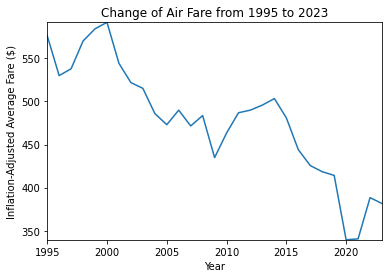

In [128]:
#column_names=df1.columns
#reduired_indices=[0,1]
#reuired_columns=[column_names[index] for index in reduired_indices]


x = df1.loc[:, ["Year"]]

y = df1.loc[:, ["Inflation-Adjusted (2023 constant dollars) Average Fare ($)"]]


def plot(x, y, ax, title, x_label, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)
    
fig, ax = plt.subplots()
plot(x, y, ax, 'Change of Air Fare from 1995 to 2023',"Year", 'Inflation-Adjusted Average Fare ($)')

#don't know if the following is helful and when to use it
for i in plt.get_fignums():
    plt.figure(i)
    plt.savefig('figure%d.png' % i)

## Figure analysis

Here, we can see a general trend of the prices going down. This general trend can be explained by airlines trying to compensate for the lower prices by having more passengers book their flights ["keeping fares low enough to stay competitive, making sure seats are full, and turning around a profit."](https://money.com/airline-profit-per-passenger/). However, did the decrease in price equal the percentage increase in peopel's average income? 

_________________________________________________________________________________________________________________________
WE can see certain years where the prices are sharply increasing (late 1990s, early 2010s and post-2022) which might be due to 

We can also see some serious dips that preceed these sharp increses in price (putting these dips into consideratino, it's more accurate? to say that the sharp increases are only sharp becuase they were preceeded by significant decreases in price. This isn't very applicable to the first rise in prices in late 1990s, but is certainly the case a little before 2010 (potentially the 2008 recession).  

If we were to analyze the dips and rises a little further in order to predict potentail rises and falls in ticket prices in the future, we can take 2008 recesesino and COVID as case studies to getmore info about how a decrease in price on the plot doesn't necessarily mean that prices acgually decreased. 

1) recession: we could ask ourselve a question of whether the decrease in price we see is due to a reduction in the number of domestic flights averaged over the year (with no reduction in the actual prices of tickets), or wehther the number of lights was almost maintained but airline companies had to cut the price to match the reduced income that many people were experincing due to layoffs and companies bankrucies. - airfare will be more corresponsive to people's average income and societal trends of studying in an out-of-state college or of setteling in a different state entirely. 

2) covid: prices actually sky rocketed when flights where available but since the figures are averages, and since covid lasted so long, the lack of flihts trnaslated into a decreased average price while it's just a reduction in the number of flights, not fligts's ticket expenses. This [article](https://www.traveldailymedia.com/airlines-in-the-united-states-report-record-profits/) explains how price increased about 43% in 2021 due to covid. Check out this article about how revuenes were their top highest in 2022: (evacautino flights reached --- evidce - those are internation flights though, hpw many less flights were recorded then). The spike that follows is so big becuase people needed to go back to the placs where they were studying, working or living, and because psychologically, people wanted a break


another point to consider is the number of flights a year. The downward trend could be considred a reduction in price only if if the same number of flights in 1995 was mainainted until now. However, it's likley that number of flights almost quindripled (evidence), which means that airlines might still be profiting as much as they used to or more, since a lot of . We could also look at the aircraft sizes and see whether the increase in the number of flights is happening while taking in more passengers per flight, or wehther 
other consdieration like the faster motor engines (reduces the amount of gas spent per flight, making the same price more profitable for airlines- evidence) is a point of analysis.  

However' regardless of how these consdieration tell us that decreased prices don't mean that prices aren't expensive (they could be reduced if companies aren't increasing in thier profits), it's also reasonable to think that more and more people are considering flying a casual expense, not becuase it's not expensive but becuase the public image of the necessity of taking vacations or of exploring other regions in the US or elsewhere, important. 

Having said that, it could also be the case that airlines aren't getting most of their profits from flying domestically. - check that out. Check the percentage oef domestic flights that are economy vs business

it's also a point to consider that most of flight expense don't come from ticket itself, ut from baggage chekcing-in, and other services. ["Baggage fees and reservation penalties are the two most lucrative categories for airlines in terms of net profits."](https://money.com/airline-profit-per-passenger/)

gas prices 

(After we've seen the trends) Other than the three rises and dips, if we were to average the sharp dips with the sharp rises, we would more or less get a smooth, almost linear decrease of prices over time. If we were to consider the sharp rises without the dips, the sharp rises won't be rises anymore to phrase it that way: but it'll be usefl to get a numeric/quantiave representation of this downward trend. while the figure above helped us dnetify dips and increaes, we'll use a scatter plot We'll go ahead and try calculate correlation coeffieceit (becuase it's staritforwrd) and we'll go ahea and do a regression with R squared.

[-7.01802728e+00  1.45779690e+04]


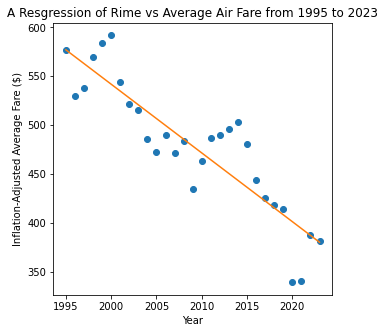

In [140]:
x = df1.loc[:, "Year"]
y = df1.loc[:32, "Inflation-Adjusted (2023 constant dollars) Average Fare ($)"] ##we're exludigng the year 2023 - make note 

# Initialize layout
fig, ax = plt.subplots(figsize = (5, 5))

# Add scatterplot
plt.plot(x,y,'o')
plt.title ("A Resgression of Rime vs Average Air Fare from 1995 to 2023")
plt.xlabel("Year")
plt.ylabel("Inflation-Adjusted Average Fare ($)")

slope_intercept_trendline = np.polyfit(x,y,1)   #Finding the slope and intercept for the trendline
compute_y_given_x = np.poly1d(slope_intercept_trendline) #Defining a function that computes the 'y' given 'x' for the trendline
plt.plot(x,compute_y_given_x(x)) #Plotting the trendline

print(slope_intercept_trendline)


As we can notice the slope and the R-squared?

In the figure above, we've included 2023. However, we decided not to in the begging, since we only have a quartely report from it, not an annual one. We'll go ahead and repeat the scatter but this one without the year 2023, and we'll see what changes.

[-7.02639192e+00  1.45947317e+04]


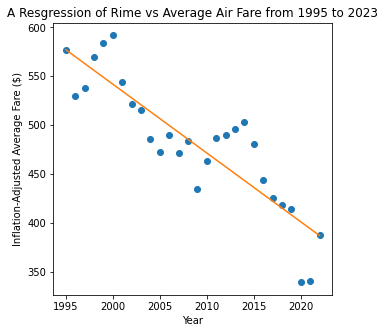

In [139]:
x = df1.loc[:31, "Year"]
y = df1.loc[:31, "Inflation-Adjusted (2023 constant dollars) Average Fare ($)"] ##we're exludigng the year 2023 - make note 

# Initialize layout
fig, ax = plt.subplots(figsize = (5, 5))

# Add scatterplot
plt.plot(x,y,'o')
plt.title ("A Resgression of Rime vs Average Air Fare from 1995 to 2023")
plt.xlabel("Year")
plt.ylabel("Inflation-Adjusted Average Fare ($)")

slope_intercept_trendline = np.polyfit(x,y,1)   #Finding the slope and intercept for the trendline
compute_y_given_x = np.poly1d(slope_intercept_trendline) #Defining a function that computes the 'y' given 'x' for the trendline
plt.plot(x,compute_y_given_x(x)) #Plotting the trendline

#printing the slope and intercept
print(slope_intercept_trendline)


Notice also that the slope didn't change significantly(it became a little bit more negative as it went from -7.018 to -7.026) and that's because th 2023 average air fare value was more positive than thant of 2020, so when one "more" positive value was omitted (the 2023 one), the "more" negative 2020 value got to be weighted more heavily. Although the slope isn't affected much, Out of accuracy and completeness, it's better not to include 2023 even if didn't affect the slope. Other derived infomration/analysis might be affected later on, and we want to avoid that. megative correlation between the year and the inflation adjusted average 

Let's go ahead and do some descriptive analysis on the max, min, and average.Ususally it's a first step to do these descriptive numbers first but since our dataset is small and we were concered of the geenral trend first, it's more useful to do descriptives now than in the begingging. Do some descreptive analysis: the min and max average was what? 


In [141]:
df1.describe()

,Year,Inflation-Adjusted (2023 constant dollars) Average Fare ($),Unadjusted (current dollars) Average Fare
count,29.000000,29.000000,29.000000
mean,2009.000000,478.752202,334.362050
std,8.514693,67.321874,32.833592
min,1995.000000,339.469866,276.627986
25%,2002.000000,434.864250,309.170375
50%,2009.000000,486.028622,328.547944
75%,2016.000000,521.906557,354.555110
max,2023.000000,591.797369,396.396849


looking at the summary teble above, I'm fosucing on the min/max and average of the values. The min value probably corresponds to 2020 (from the graph)- since it is too far from the other ponts, let's see what the minimum would be if we excluded 2020


In [152]:
df1.nsmallest(3, "Inflation-Adjusted (2023 constant dollars) Average Fare ($)")


,Year,Inflation-Adjusted (2023 constant dollars) Average Fare ($),Inflation-Adjusted (2023 constant dollars) Percent Change From Previous Year,Inflation-Adjusted (2023 constant dollars) Percent Change Cumulative from 1995,Unadjusted (current dollars) Average Fare,Unadjusted (current dollars) Percent Change From Previous Year,Unadjusted (current dollars) Percent Change Cumulative from 1995
29,2020,339.469866,-18.039912,-41.100469,292.262322,-17.028783,0.02524
30,2021,340.539381,0.315055,-40.914903,306.956918,5.027879,5.054387
32,2023,381.553764,-1.765424,-33.798726,381.553764,0.906596,30.584765


As the plot showed earlier, 2020 is the year with the smallest average fare. I picked min 3 expecting the first and second ones to be 2020 and 2021. However, since the third one corresponds to hte value for 2023, we'll go ahead ad find the smallest 4, since we've initally exlucded 2023.

In [153]:
df1.nsmallest(4, "Inflation-Adjusted (2023 constant dollars) Average Fare ($)")


,Year,Inflation-Adjusted (2023 constant dollars) Average Fare ($),Inflation-Adjusted (2023 constant dollars) Percent Change From Previous Year,Inflation-Adjusted (2023 constant dollars) Percent Change Cumulative from 1995,Unadjusted (current dollars) Average Fare,Unadjusted (current dollars) Percent Change From Previous Year,Unadjusted (current dollars) Percent Change Cumulative from 1995
29,2020,339.469866,-18.039912,-41.100469,292.262322,-17.028783,0.02524
30,2021,340.539381,0.315055,-40.914903,306.956918,5.027879,5.054387
32,2023,381.553764,-1.765424,-33.798726,381.553764,0.906596,30.584765
31,2022,388.410863,14.057547,-32.608988,378.125693,23.185265,29.411526


- delete: we can also notice that a 150 dollar differnece between the average and the max value isn't acutally a lot. So although it's true that domestic flight average prices decreased over the past 27 years, the plot kind of exagerates that becuase we have 50 dollar intervals in the y-axis. If the incremntation was 100 dollars, the line, although will have the same value, will look less steeper. Adding on that 

From the 4 values above, we can see that the min value after the exceptionally low values of 2020 and 2021 (COVID is only applicable to 2021 though) corresponds to the year 2022, averaging at 388 dollars. Let's check the top 4 largest values as well


In [154]:
df1.nlargest(4, "Inflation-Adjusted (2023 constant dollars) Average Fare ($)")


,Year,Inflation-Adjusted (2023 constant dollars) Average Fare ($),Inflation-Adjusted (2023 constant dollars) Percent Change From Previous Year,Inflation-Adjusted (2023 constant dollars) Percent Change Cumulative from 1995,Unadjusted (current dollars) Average Fare,Unadjusted (current dollars) Percent Change From Previous Year,Unadjusted (current dollars) Percent Change Cumulative from 1995
9,2000,591.797369,1.280364,2.679475,338.996371,4.684746,16.019721
8,1999,584.315997,2.476994,1.381423,323.825947,4.74029,10.827724
4,1995,576.354107,NaN,NaN,292.188575,NaN,NaN
7,1998,570.192365,5.99083,-1.06909,309.170375,7.641777,5.811932


## Some insightes from the largest 4 values 

Looking at the above values, we can notice that teh largest average air fare was for the year 200, in contrary to someone's inital thought that a negative slop of the trend line of all prices for the past 27 years will mean that 1995 was the highest price (if we were to not look at the plot or the table)(should I delete this?). This increase in price for the year 2000 could be the intention of many airlines to compnseate for the decrease in prices in the years 1996 and 1997, which accounts for a differnce in about 100 dollars (from original table)


## Conclusion about price trend over the years 

Other than noticing that the biggest fare corresponds to the year 2000, if we were to ignore this fare which is 591, we'll be talking about a 200 dollar difference between the second largest value and the third smallest value. Monetarily speaking, 200 dollars isn't actually a big diffrence between the biggest averages and teh smallest ones accross 27 years (considering that people's income increased in about ). Anotehr way to look at it is that the lowest average, which we're considering an excpetional low record due to COVID, is only about 130 dollar difference from the average (is this a good insight to have? sice these low records were alsp accounted for in the average).

However, to assess whether the decrease in prices is significant or not, it's useful to look at the decrease in terms of percentage decrease of original price. Assuming taht the origial price is 1995 and that the latest price is 2022, we can calcualte the percentage decrease using: (original price - latest price) / original price x 100%



In [156]:
original_price = 576.354107
latest_price = 388.410863
subtraction = original_price - latest_price
division = (subtraction/original_price)*100

print (division)

32.60898841829542


So from 1995 to 2022, we have ~ 33% price decrease. I consider this to be a significant decrase and so will go ahead and consider the (is there a test or theory I can quote?)

## We're actually not done yet : further analysis: can we look at it in another way?

At the same time, since this 33% decrase is only a decrase in average prices throughout the years, it doesn't tell us much about times of the year where prices are more expeinsve - since I booked mine in the summer, maybe let's try to look at quartile ifomratino and ones with international flight. Maybe I was right about having summer tickets be the most expensive they've been until now, but that isn't applicable for annual averages. (maybe the drop in the number of flight during some winter months offsets the increase in prices? donesn't make sense as a comparison) 

Let's first look at the domestic flights for all 4 quarters first

In [168]:
df2 = pd.read_excel('Quarterly national level domestic average fare  series.xlsx')
df2.head(11)

,Year,Quarter,U.S. Average (Current $),U.S. Average (Inflation-Adjusted $)
0,1995,1,296.895553,591.590956
1,1995,2,296.462724,585.553486
2,1995,3,287.514840,565.403637
3,1995,4,287.776292,563.215925
4,1996,1,283.969692,550.746087
5,1996,2,275.447988,528.985661
6,1996,3,269.489045,514.801139
7,1996,4,278.327826,527.883988
8,1997,1,283.403523,533.917556
9,1997,2,289.186077,542.657734


From looking at the table we can see that the titles are correct and that data seems to be organized well. However, let's check that we have all he values. We're supposed to have 4 quarters for each year, and we have 29 years ((2023-1995) +1). 

In [170]:
number_of_rows = 29*4
print(number_of_rows)

116


In [171]:
len(df2)

113

The 3 missing rows tell us that we only have Q1 for 2023, which makes sense. Let's check that in the table:

In [172]:
df2.nlargest(4, "Year")


,Year,Quarter,U.S. Average (Current $),U.S. Average (Inflation-Adjusted $)
112,2023,1,381.553764,381.553764
108,2022,1,328.493121,347.561390
109,2022,2,397.160594,408.079257
110,2022,3,382.539908,387.956307


As we can see from the largest value by year, we only have one quarter for 2023.

Now let's check the **data types**.

In [173]:
df2.dtypes


Year                                      int64
Quarter                                   int64
U.S. Average (Current $)                float64
U.S. Average (Inflation-Adjusted $)     float64
dtype: object

The data types don't need any changing.

Now let's start organizing all the years by quarters (all the values of air fare for Q1, all the values or air fare for Q2, etc.)

In [193]:

#df2_rows_of_interest = df2.loc[:, ["Year","Quarter","U.S. Average (Inflation-Adjusted $)"]]
grouped_quarters = df2.groupby(["Quarter"])
#to view the values organized by quarter
#for key, item in grouped_quarters:
   # print("Key is: " + str(key))
    #print(str(item), "\n\n")
    

# Showing only 3 decimals for all float numbers
pd.options.display.float_format = '{:.3f}'.format

grouped_quarters.agg(np.mean)

,Year,U.S. Average (Current $),U.S. Average (Inflation-Adjusted $)
Quarter,,,
1,2009.000,333.174,483.685
2,2008.500,334.319,484.761
3,2008.500,328.578,473.855
4,2008.500,332.188,478.260


## Quarterly analysis

Looking at teh U.S. Average (Inflation-Adjusted $) column, we can see that the average air fare per quarter is almost even across all 4 quarters, and is also very similar to the average of the average annual air fare with was 479 dollars. A more insightful analysis would be one where we know the highest quarterly price and teh lowest one, and the trend of the same quarter over the years. We can make a plot of that first and then do some descriptive analysis. (make 4 lines on same plot)

Another variable should be international flights, but there wasn't one provided by. A route dataset should also help, but hte one availbe at- there will be a part 2 where I scarp the apis and get this info

## Machine Learning 

Let's shift gears and try to use the rest of the variables/some of hte variables we can think of, and try to make a machine learning predictive model that can help us predict the price of a future flight during the year of 2023 (in order to not need to account for inflation, since the rates can change). Although I prefer feeding the prediction model with airline-specific data, those databases were not easily accesable, and what was easily accesable were the air fare by city/departure airport.  Although a prediction dependanta on the airline might have been more realistic (it sounds more reasonable that flight prices will differ accoring to budgeting model, target customers (more of business class or economy class), etc.) but looking at differneces in prices based on the airport might actually give us an insight on some of hte hidden tackticts of the airline industry. 

Let's see what we're going ot find out:(write where you got the dataset from, why I chose these cities, supervised/unsupervised - when the dataset has no labels, use unsupervised)

In [15]:
df3 = pd.read_csv('Airfares_by_airport.csv')
df3.head()

,Average Domestic Air Fares,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Year,Quarter,U.S. Average (Current $),U.S. Average (Inflation-Adjusted $),Chicago O'Hare - IL (Current $),Chicago O'Hare - IL (Inflation-Adjusted $),Newark-Liberty - NJ (Current $),Newark-Liberty - NJ (Inflation-Adjusted $),San Francisco - CA (Current $),San Francisco - CA (Inflation-Adjusted $)
2,1995,1,296.9,591.59,340.25,677.98,366.89,731.06,358.01,713.36
3,1995,2,296.46,585.55,346.03,683.46,377.5,745.61,366.31,723.51
4,1995,3,287.51,565.4,353.43,695.03,379.86,747,355.9,699.88


## Changes to make

1) Need to rename the columns 
2) Need to delete the first 2 rows
3) Need to delete the non-inflation-adjusted columns

In [18]:
df3_cleaned=df3.drop(df.index[[0,1]])

df3_cleaned.columns = ['Year',
               'Quarter',
               'U.S. Average (Current $)',
               'U.S. Average (Inflation-Adjusted $)',
               'Chicago OHare -  IL (Current $)',
               'Chicago OHare -  IL (Inflation-Adjusted $)',
               'Newark-Liberty -  NJ (Current $)',
               'Newark-Liberty -  NJ (Inflation-Adjusted $)',
               'San Francisco -  CA (Current $)',
               'San Francisco -  CA (Inflation-Adjusted $)']
              

df3_cleaned.head()

,Year,Quarter,U.S. Average (Current $),U.S. Average (Inflation-Adjusted $),Chicago OHare - IL (Current $),Chicago OHare - IL (Inflation-Adjusted $),Newark-Liberty - NJ (Current $),Newark-Liberty - NJ (Inflation-Adjusted $),San Francisco - CA (Current $),San Francisco - CA (Inflation-Adjusted $)
2,1995,1,296.9,591.59,340.25,677.98,366.89,731.06,358.01,713.36
3,1995,2,296.46,585.55,346.03,683.46,377.5,745.61,366.31,723.51
4,1995,3,287.51,565.4,353.43,695.03,379.86,747,355.9,699.88
5,1995,4,287.78,563.22,351.12,687.19,380.4,744.49,352.65,690.18
6,1996,1,283.97,550.75,339.02,657.51,358.62,695.53,349,676.87


In [19]:
df_airports_analysis = df3_cleaned.drop(['U.S. Average (Current $)',
                  'Chicago OHare -  IL (Current $)', 
                  'Newark-Liberty -  NJ (Current $)',
                  'San Francisco -  CA (Current $)'], axis=1)

df_airports_analysis.head()

,Year,Quarter,U.S. Average (Inflation-Adjusted $),Chicago OHare - IL (Inflation-Adjusted $),Newark-Liberty - NJ (Inflation-Adjusted $),San Francisco - CA (Inflation-Adjusted $)
2,1995,1,591.59,677.98,731.06,713.36
3,1995,2,585.55,683.46,745.61,723.51
4,1995,3,565.4,695.03,747,699.88
5,1995,4,563.22,687.19,744.49,690.18
6,1996,1,550.75,657.51,695.53,676.87


Let's check teh data types:

In [22]:
df_airports_analysis.dtypes

Year                                           object
Quarter                                        object
U.S. Average (Inflation-Adjusted $)            object
Chicago OHare -  IL (Inflation-Adjusted $)     object
Newark-Liberty -  NJ (Inflation-Adjusted $)    object
San Francisco -  CA (Inflation-Adjusted $)     object
dtype: object

Need to change the datatype from object to integer for "Year" column and float for the otheres 

In [26]:
df_airports_analysis[["U.S. Average (Inflation-Adjusted $)",
                      'Chicago OHare -  IL (Inflation-Adjusted $)',
                      'Newark-Liberty -  NJ (Inflation-Adjusted $)',
                      'San Francisco -  CA (Inflation-Adjusted $)'
                     ]] = df_airports_analysis[["U.S. Average (Inflation-Adjusted $)",
                      'Chicago OHare -  IL (Inflation-Adjusted $)',
                      'Newark-Liberty -  NJ (Inflation-Adjusted $)',
                      'San Francisco -  CA (Inflation-Adjusted $)']].apply(pd.to_numeric)

#df_airports_analysis["Year","Quarter"] = pd.to_numeric(df_airports_analysis["Year","Quarter"])
df_airports_analysis.dtypes

Year                                            object
Quarter                                         object
U.S. Average (Inflation-Adjusted $)            float64
Chicago OHare -  IL (Inflation-Adjusted $)     float64
Newark-Liberty -  NJ (Inflation-Adjusted $)    float64
San Francisco -  CA (Inflation-Adjusted $)     float64
dtype: object

visualize the table using a normal scatter plot first 

In [20]:
ax = df_airports_analysis.plot(ylabel = 'GDP per capita',figsize = (10,6),marker='o')
ax.yaxis.set_major_formatter('${x:,.0f}')

TypeError: no numeric data to plot